In [1]:
import pandas as pd # conda install pandas
import numpy as np
import matplotlib.pyplot as plt # conda install matplotlib
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import seaborn as sns # conda install seaborn
# conda update -c conda-forge seaborn
from sklearn.model_selection import train_test_split # conda install scikit-learn
from sklearn.preprocessing import OneHotEncoder, RobustScaler

# Carga de datos y vista general

In [2]:
df = pd.read_csv("data-2024-06-12.csv")

In [3]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price,processed_date
0,6901257,5.010635,Apartment,Entire home/apt,"{Wireless Internet, Air conditioning, Kitchen,...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Brooklyn Heights,2,100.0,11201,1.0,1.0,150,2024-06-12
1,6304928,5.129899,Apartment,Entire home/apt,"{Wireless Internet, Air conditioning, Kitchen,...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Hell's Kitchen,6,93.0,10019,3.0,3.0,169,2024-06-12
2,13418779,6.620073,House,Entire home/apt,"{TV, Cable TV, Internet, Wireless Internet, Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Lower Haight,0,NaN,94117,2.0,2.0,750,2024-06-12
3,12422935,4.442651,Apartment,Private room,"{TV, Wireless Internet, Heating, Smoke detecto...",2,1.0,Real Bed,strict,True,...,37.753164,-122.429526,Noe Valley,3,100.0,94131,1.0,1.0,85,2024-06-12
4,11825529,4.418841,Apartment,Entire home/apt,"{TV, Internet, Wireless Internet, Air conditio...",3,1.0,Real Bed,moderate,True,...,33.980454,-118.462821,NaN,15,97.0,90292,1.0,1.0,82,2024-06-12


## Creación de columnas correspondientes a *amenities*

In [4]:
amenities = []
def listar(x,amenities):
    amenities += (x.replace("{","").replace("}","").replace("\"","").split(","))
    return x
df.amenities.apply(lambda x: listar(x, amenities))
amenities = [amenity[1:] if len(amenity) and amenity[0] == " " else amenity for amenity in amenities]
amenities = list(set(amenities))
if "" in amenities: amenities.remove("")
sorted(amenities)

['24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air purifier',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Bath towel',
 'Bathtub',
 'Bathtub with shower chair',
 'Beach essentials',
 'Beachfront',
 'Bed linens',
 'Body soap',
 'Breakfast',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Cooking basics',
 'Crib',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Doorman Entry',
 'Dryer',
 'EV charger',
 'Elevator',
 'Elevator in building',
 'Essentials',
 'Ethernet connection',
 'Extra pillows and blankets',
 'Family/kid friendly',
 'Fire extinguisher',
 'Fireplace guards',
 'Firm matress',
 'Firm mattress',
 'First aid kit',
 'Fixed grab bars for shower & toilet',
 'Flat',
 'Flat smooth pathway to front do

In [5]:
df = pd.concat([df, pd.DataFrame(columns=amenities)], axis=1)

In [6]:
for column in amenities:
    df[column] = df.amenities.apply(lambda x: 1 if column in x else 0)
df.drop(["amenities"], axis=1, inplace=True)

In [7]:
df.sample(5)

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,Handheld shower head,Smart lock,Hand soap,Bathtub,Dishwasher,Private entrance,Body soap,Lock on bedroom door,Iron,Babysitter recommendations
43190,15635467,3.401197,Apartment,Private room,1,1.0,Real Bed,flexible,False,LA,...,0,0,0,0,0,0,0,0,0,0
36240,9492864,4.442651,Apartment,Entire home/apt,5,1.0,Real Bed,flexible,False,NYC,...,0,0,0,0,0,0,0,0,1,0
26547,20515919,4.700480,House,Private room,2,2.5,Real Bed,flexible,False,NYC,...,0,0,0,0,0,0,0,0,0,0
38103,12028384,5.043425,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,Boston,...,0,1,0,0,1,0,0,0,1,0
11768,15913986,5.220356,Apartment,Entire home/apt,4,1.0,Real Bed,flexible,True,NYC,...,0,0,0,0,0,0,0,0,0,0


Hay columnas de amenities que hacen referencia a lo mismo:
* *Firm matress* y *Firm mattress*,
* *Smart lock* y *Smartlock*,
* *Wide clearance to shower & toilet* y *Wide clearance to shower and toilet*.
Se unifican dichas columnas.

In [8]:
df["Firm mattress"] = df["Firm mattress"] + df["Firm matress"]
df["Firm mattress"] = df["Firm mattress"].apply(lambda x: 1 if x > 0 else 0)
df["Smart lock"] = df["Smart lock"] + df["Smartlock"]
df["Smart lock"] = df["Smart lock"].apply(lambda x: 1 if x > 0 else 0)
df["Wide clearance to shower and toilet"] = df["Wide clearance to shower and toilet"] + df["Wide clearance to shower & toilet"]
df["Wide clearance to shower and toilet"] = df["Wide clearance to shower and toilet"].apply(lambda x: 1 if x > 0 else 0)
df.drop(["Firm matress", "Smartlock", "Wide clearance to shower & toilet"], axis=1, inplace=True)

# Creación de los conjuntos train y test

In [9]:
train, test = train_test_split(df, test_size=0.2, random_state=0)

In [10]:
print(f"Tamaño del train set: {train.shape}.")
print(f"Tamaño del test set: {test.shape}.")

Tamaño del train set: (41873, 153).
Tamaño del test set: (10469, 153).


# Limpieza de datos

In [11]:
print("Columnas numéricas y categóricas sin tener en cuenta las de amenities (son numéricas).")
print(f"Columnas numéricas: {list(train.loc[:,:"price"].select_dtypes(include=["number","datetime"]).columns)}")
print(f"Columnas categóricas: {list(train.loc[:,:"price"].select_dtypes(exclude=["number","datetime"]).columns)}")

Columnas numéricas y categóricas sin tener en cuenta las de amenities (son numéricas).
Columnas numéricas: ['id', 'log_price', 'accommodates', 'bathrooms', 'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating', 'zipcode', 'bedrooms', 'beds', 'price']
Columnas categóricas: ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'instant_bookable', 'last_review', 'neighbourhood']


Hay algunas columnas cuyo tipo no se corresponde. Se cambian los tipos:

In [12]:
train["first_review"] = pd.to_datetime(train["first_review"])
train["host_since"] = pd.to_datetime(train["host_since"])
train["last_review"] = pd.to_datetime(train["last_review"])
train["processed_date"] = pd.to_datetime(train["processed_date"])
train["host_response_rate"] = train["host_response_rate"].apply(lambda x: float(x[:-1]) if type(x) == str else np.nan)
train["zipcode"] = train.zipcode.apply(lambda x: str(int(float(x))).zfill(5))
test["first_review"] = pd.to_datetime(test["first_review"])
test["host_since"] = pd.to_datetime(test["host_since"])
test["last_review"] = pd.to_datetime(test["last_review"])
test["processed_date"] = pd.to_datetime(test["processed_date"])
test["host_response_rate"] = test["host_response_rate"].apply(lambda x: float(x[:-1]) if type(x) == str else np.nan)
test["zipcode"] = test.zipcode.apply(lambda x: str(int(float(x))).zfill(5))

In [13]:
print("Columnas numéricas y categóricas sin tener en cuenta las de amenities (son numéricas).")
columnas_numericas = list(train.loc[:,:"price"].select_dtypes(include=["number","datetime"]).columns)
columnas_categoricas = list(train.loc[:,:"price"].select_dtypes(exclude=["number","datetime"]).columns)
print(f"Columnas numéricas: {columnas_numericas}")
print(f"Columnas categóricas: {columnas_categoricas}")

Columnas numéricas y categóricas sin tener en cuenta las de amenities (son numéricas).
Columnas numéricas: ['id', 'log_price', 'accommodates', 'bathrooms', 'first_review', 'host_response_rate', 'host_since', 'last_review', 'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds', 'price']
Columnas categóricas: ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'neighbourhood', 'zipcode']


## Tratamiento de nulos

In [14]:
# Columnas con nulos:
print(f"Columnas con nulos en el train set: {train.columns[train.isna().any()].tolist()}")
print(f"Columnas con nulos en el test set: {test.columns[test.isna().any()].tolist()}")

Columnas con nulos en el train set: ['bathrooms', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'last_review', 'neighbourhood', 'review_scores_rating', 'bedrooms', 'beds']
Columnas con nulos en el test set: ['bathrooms', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'last_review', 'neighbourhood', 'review_scores_rating', 'bedrooms', 'beds']


In [15]:
# Cantidad de nulos por columna.
train[train.columns[train.isna().any()]].isna().sum()

bathrooms                    98
first_review               9278
host_has_profile_pic        111
host_identity_verified      111
host_response_rate        11846
host_since                  111
last_review                9258
neighbourhood              3435
review_scores_rating       9806
bedrooms                     55
beds                         70
dtype: int64

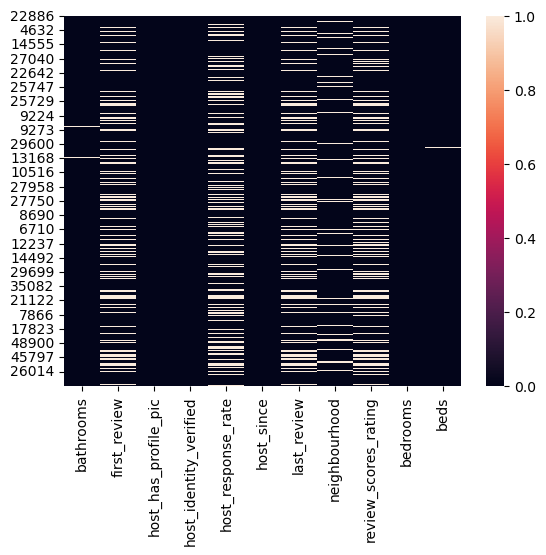

In [16]:
sns.heatmap(train[train.columns[train.isna().any()].tolist()].isna())
plt.show()

In [17]:
# Se imputan medianas y modas a las columnas en las que hay nulos:
train[columnas_numericas] = train[columnas_numericas].fillna(train[columnas_numericas].median())
test[columnas_numericas] = test[columnas_numericas].fillna(test[columnas_numericas].median())
train[columnas_categoricas] = train[columnas_categoricas].fillna(train[columnas_categoricas].mode())
test[columnas_categoricas] = test[columnas_categoricas].fillna(test[columnas_categoricas].mode())

In [18]:
# Sigue habiendo nulos:
train[train.columns[train.isna().any()]].isna().sum()

host_has_profile_pic       111
host_identity_verified     111
neighbourhood             3435
dtype: int64

In [19]:
# Se toma la decisión de eliminar la columna neighbourhood y las filas que tengan nulos en el resto de columnas:
train.drop(["neighbourhood"], axis=1, inplace=True)
train.dropna(inplace=True)
test.drop(["neighbourhood"], axis=1, inplace=True)
test.dropna(inplace=True)


In [20]:
# Columnas con nulos:
print(f"Columnas con nulos en el train set: {train.columns[train.isna().any()].tolist()}")
print(f"Columnas con nulos en el test set: {test.columns[test.isna().any()].tolist()}")

Columnas con nulos en el train set: []
Columnas con nulos en el test set: []


## Tratamiento de duplicados

In [21]:
# Duplicados
print(f"Filas duplicadas en el train set: {train[train.duplicated()].shape[0]}.")
print(f"Filas duplicadas en el test set: {test[test.duplicated()].shape[0]}.")

Filas duplicadas en el train set: 0.
Filas duplicadas en el test set: 0.


## Limpieza de columnas numéricas

In [22]:
print(f"Columnas numéricas: {columnas_numericas}")

Columnas numéricas: ['id', 'log_price', 'accommodates', 'bathrooms', 'first_review', 'host_response_rate', 'host_since', 'last_review', 'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds', 'price']


### Columna *id*

In [23]:
train.id.value_counts()
# No hay valores repetidos, es una columna identificadora. No interesa tener una columna que identifique de forma única a las habitaciones en el problema.

id
10011086    1
9637712     1
9902985     1
9365581     1
14907455    1
           ..
8186531     1
17410346    1
13642074    1
12535960    1
15551602    1
Name: count, Length: 41762, dtype: int64

In [24]:
# Se procede a la eliminación de la columna:
train.drop(["id"], axis=1, inplace=True)
test.drop(["id"], axis=1, inplace=True)

### Columna *log_price*

In [25]:
# Se elimina dicha columna porque se tiene la columna price, que es la que muestra realmente los valores de los precios de las habitaciones y no su logaritmo neperiano.
train.drop(["log_price"], axis=1, inplace=True)
test.drop(["log_price"], axis=1, inplace=True)

### Columnas *review_scores_rating*, *bedrooms* y *beds*

In [26]:
# Son valores enteros pero vienen en tipo decimal. Se transforman a tipo entero:
train[["review_scores_rating","bedrooms","beds"]].head()

,review_scores_rating,bedrooms,beds
22886,97.0,2.0,2.0
10115,100.0,1.0,1.0
5972,90.0,1.0,1.0
31282,100.0,1.0,1.0
23369,96.0,1.0,1.0


In [27]:
train[["review_scores_rating","bedrooms","beds"]] = train[["review_scores_rating","bedrooms","beds"]].astype("int")
test[["review_scores_rating","bedrooms","beds"]] = test[["review_scores_rating","bedrooms","beds"]].astype("int")

In [28]:
columnas_numericas = list(train.loc[:,:"price"].select_dtypes(include=["number","datetime"]).columns)
columnas_categoricas = list(train.loc[:,:"price"].select_dtypes(exclude=["number","datetime"]).columns)
print(f"Columnas numéricas: {columnas_numericas}")
print(f"Columnas categóricas: {columnas_categoricas}")

Columnas numéricas: ['accommodates', 'bathrooms', 'first_review', 'host_response_rate', 'host_since', 'last_review', 'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds', 'price']
Columnas categóricas: ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'zipcode']


### Columna *processed_date*

In [29]:
# Se elimina dicha columna porque fue generada durante el proceso de ETL por el linaje de los datos (processed_date):
train.drop(["processed_date"], axis=1, inplace=True)
test.drop(["processed_date"], axis=1, inplace=True)

### Columnas de fechas: *first_review*, *host_since* y *last_review*

In [30]:
# Se convierten a tipo entero
columnas_fechas = ["first_review", "host_since", "last_review"]
for columna in columnas_fechas:
    train[columna] = pd.to_datetime(train[columna]).astype("int64") / 10 ** 9
    test[columna] = pd.to_datetime(test[columna]).astype("int64") / 10 ** 9

## Limpieza de columnas categóricas

In [31]:
print(f"Columnas categóricas: {columnas_categoricas}")

Columnas categóricas: ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'zipcode']


### Columna *property_type*

In [32]:
train.property_type.value_counts(normalize=True) * 100

property_type
Apartment             67.566209
House                 21.119678
Condominium            3.575020
Townhouse              2.169436
Loft                   1.606724
Other                  0.840477
Bed & Breakfast        0.656099
Guesthouse             0.601025
Bungalow               0.433408
Villa                  0.237058
Dorm                   0.193956
Guest suite            0.158038
Timeshare              0.136488
Camper/RV              0.129304
Hostel                 0.112543
In-law                 0.088597
Boutique hotel         0.086203
Boat                   0.076625
Cabin                  0.069441
Serviced apartment     0.031129
Tent                   0.026340
Castle                 0.019156
Yurt                   0.014367
Vacation home          0.011973
Hut                    0.009578
Treehouse              0.007184
Earth House            0.007184
Chalet                 0.004789
Cave                   0.004789
Parking Space          0.002395
Train                  0.0

In [33]:
# Como hay varias clases de las que no hay mucha representación, se asignan a la clase "Other" aquellas clases que no representan ni un 1 % de los datos:
clases = list(train.property_type.value_counts(normalize=True).tail(26).index)
print(f"Clases que se asignan a \"Other\" en la columna property_type: {clases}")

Clases que se asignan a "Other" en la columna property_type: ['Bed & Breakfast', 'Guesthouse', 'Bungalow', 'Villa', 'Dorm', 'Guest suite', 'Timeshare', 'Camper/RV', 'Hostel', 'In-law', 'Boutique hotel', 'Boat', 'Cabin', 'Serviced apartment', 'Tent', 'Castle', 'Yurt', 'Vacation home', 'Hut', 'Treehouse', 'Earth House', 'Chalet', 'Cave', 'Parking Space', 'Train', 'Lighthouse']


In [34]:
train["property_type"] = train["property_type"].apply(lambda x: "Other" if x in clases else x)
test["property_type"] = test["property_type"].apply(lambda x: "Other" if x in clases else x)

In [35]:
train.property_type.value_counts()

property_type
Apartment      28217
House           8820
Other           1655
Condominium     1493
Townhouse        906
Loft             671
Name: count, dtype: int64

### Columna *bed_type*

In [36]:
# Se elimina la columna porque apenas hay variabilidad.
train.bed_type.value_counts(normalize=True)

bed_type
Real Bed         0.970619
Futon            0.010656
Pull-out Sofa    0.008022
Airbed           0.006585
Couch            0.004119
Name: proportion, dtype: float64

In [37]:
train.drop(["bed_type"], axis=1, inplace=True)
test.drop(["bed_type"], axis=1, inplace=True)

### Columna *cancellation_policy*

In [38]:
# Se aplica un ordinal encoding porque la categoría es ordenada:
train["cancellation_policy"] = train["cancellation_policy"].apply(lambda x: 3 if x in ["super_strict_30", "super_strict_60"] else 2 if x == "strict" else 1 if x == "moderate" else 0)
test["cancellation_policy"] = test["cancellation_policy"].apply(lambda x: 3 if x in ["super_strict_30", "super_strict_60"] else 2 if x == "strict" else 1 if x == "moderate" else 0)

In [39]:
train.cancellation_policy.value_counts(normalize=True) * 100

cancellation_policy
2    41.410852
0    32.531967
1    25.982951
3     0.074230
Name: proportion, dtype: float64

### Columnas *cleaning_fee*, *host_has_profile_pic*, *host_identity_verified* y *instant_bookable*

In [40]:
# Se transforman a 1 (True) y 0 (False)
train["cleaning_fee"] = train["cleaning_fee"].apply(lambda x: 1 if x else 0)
test["cleaning_fee"] = test["cleaning_fee"].apply(lambda x: 1 if x else 0)
train["host_has_profile_pic"] = train["host_has_profile_pic"].apply(lambda x: 1 if x else 0)
test["host_has_profile_pic"] = test["host_has_profile_pic"].apply(lambda x: 1 if x else 0)
train["host_identity_verified"] = train["host_identity_verified"].apply(lambda x: 1 if x else 0)
test["host_identity_verified"] = test["host_identity_verified"].apply(lambda x: 1 if x else 0)
train["instant_bookable"] = train["instant_bookable"].apply(lambda x: 1 if x else 0)
test["instant_bookable"] = test["instant_bookable"].apply(lambda x: 1 if x else 0)

### Columna host_has_profile_pic

In [41]:
# Se elimina la columna porque apenas hay variabilidad.
train["host_has_profile_pic"].value_counts(normalize=True)

host_has_profile_pic
1    0.996887
0    0.003113
Name: proportion, dtype: float64

In [42]:
train.drop(["host_has_profile_pic"], axis=1, inplace=True)
test.drop(["host_has_profile_pic"], axis=1, inplace=True)

### Columna *zipcode*

In [43]:
print(f"Cantidad de códigos postales diferentes: {train.zipcode.nunique()}.")
# Como son muchos códigos postales, se elimina la columna.
train.drop(["zipcode"], axis=1, inplace=True)
test.drop(["zipcode"], axis=1, inplace=True)

Cantidad de códigos postales diferentes: 617.


# Visualización de los datos

In [44]:
columnas_numericas = list(train.loc[:,:"price"].select_dtypes(include=["number","datetime"]).columns)
columnas_categoricas = list(train.loc[:,:"price"].select_dtypes(exclude=["number","datetime"]).columns)

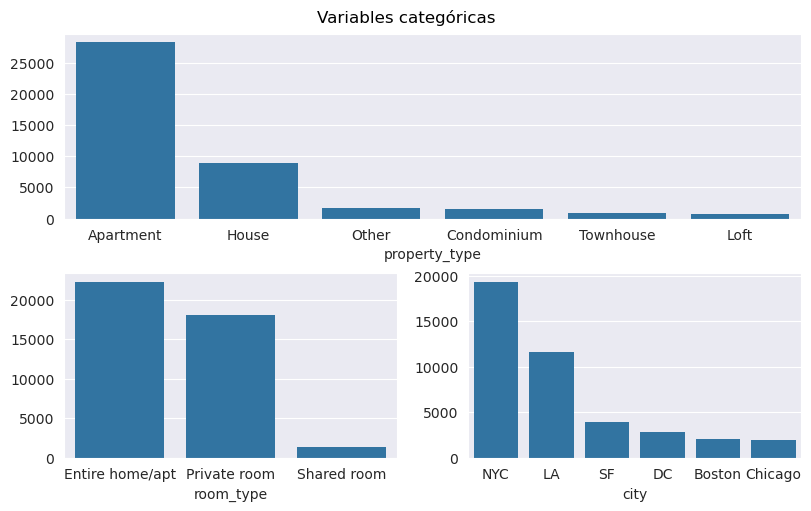

In [45]:
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec

fig = plt.figure(layout="constrained", figsize=(8,5))

gs = GridSpec(2, 2, figure=fig)
with sns.axes_style("darkgrid"):
    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[1, 1])
sns.countplot(train[columnas_categoricas], x="property_type", order=train['property_type'].value_counts().index, ax=ax1)
ax1.set_ylabel("")
sns.countplot(train[columnas_categoricas], x="room_type", order=train['room_type'].value_counts().index, ax=ax2)
ax2.set_ylabel("")
sns.countplot(train[columnas_categoricas], x="city", order=train['city'].value_counts().index, ax=ax3)
ax3.set_ylabel("")

fig.suptitle("Variables categóricas")

plt.show()

In [46]:
columnas = ["cleaning_fee","host_identity_verified","instant_bookable"]

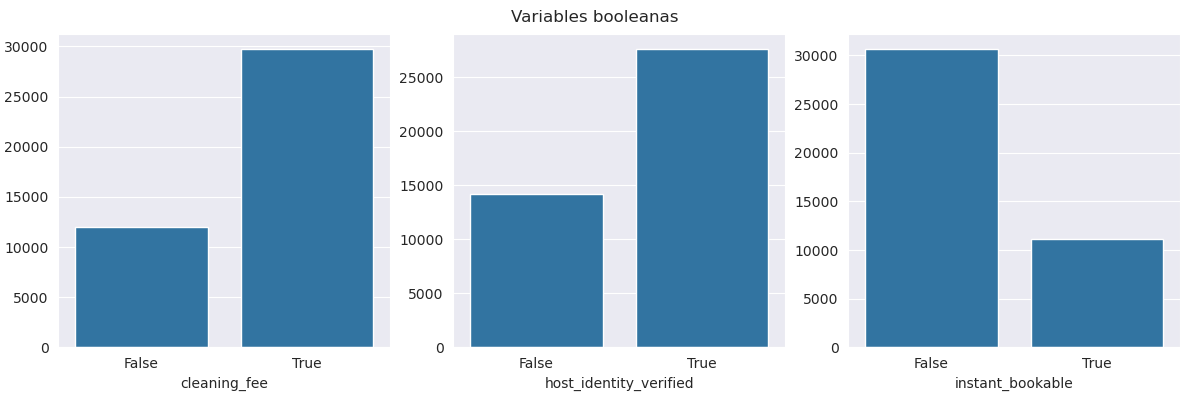

In [47]:
with sns.axes_style("darkgrid"):
    fig, axes = plt.subplots(1, len(columnas), figsize=(12,4))
    for i, columna in enumerate(columnas):
        ax = sns.countplot(x=train[columna], ax=axes[i])
        ax.set_xticks(np.arange(2), ['False', 'True'])
        ax.set_ylabel("")
    fig.tight_layout()
    fig.subplots_adjust(top=.92)
    plt.suptitle("Variables booleanas")

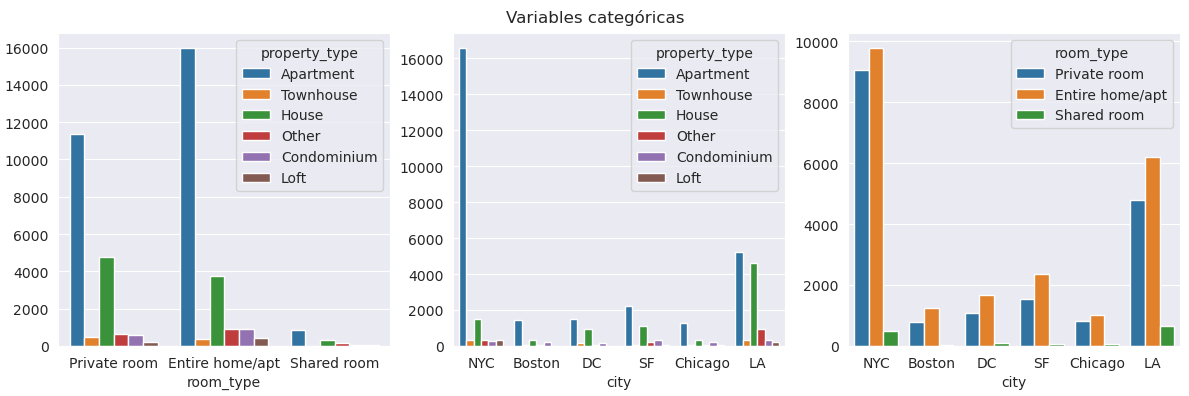

In [48]:
with sns.axes_style("darkgrid"):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    sns.countplot(hue=train["property_type"], x=train["room_type"], ax=axes[0], order=["Private room","Entire home/apt","Shared room"])
    sns.countplot(hue=train["property_type"], x=train["city"], ax=axes[1], order=["NYC","Boston","DC","SF","Chicago","LA"])
    sns.countplot(hue=train["room_type"], x=train["city"], ax=axes[2], order=["NYC","Boston","DC","SF","Chicago","LA"], hue_order=["Private room","Entire home/apt","Shared room"])
    [ax.set_ylabel("") for ax in axes]
    fig.tight_layout()
    fig.subplots_adjust(top=.92)
    plt.suptitle("Variables categóricas")

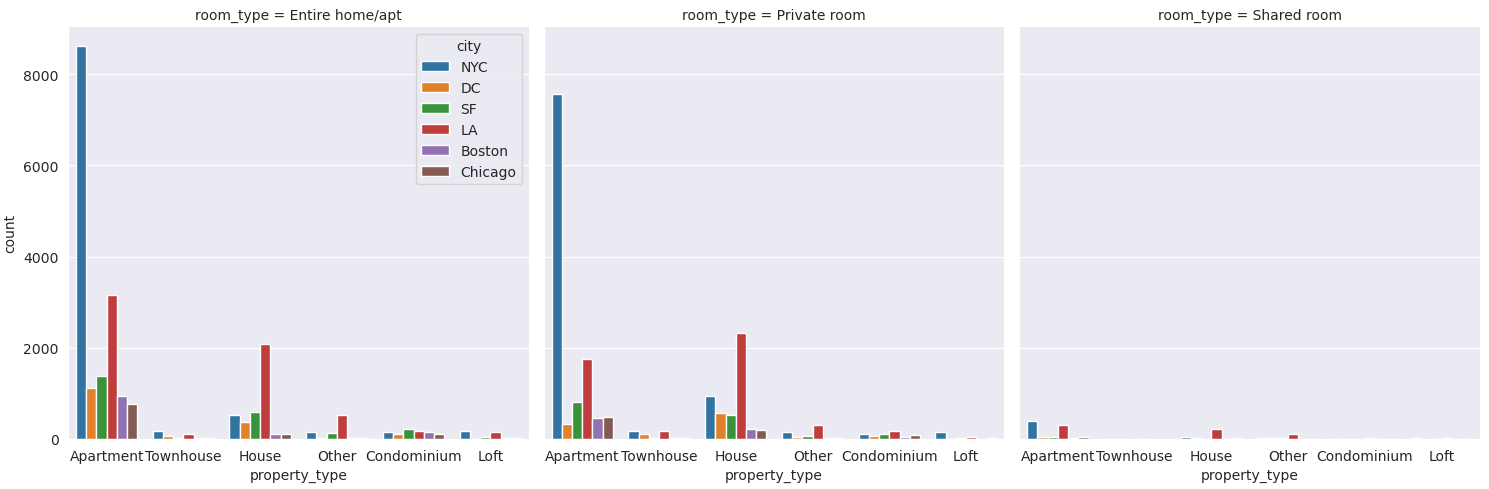

In [49]:
with sns.axes_style("darkgrid"):
    ax = sns.catplot(x='property_type', hue='city', col='room_type', data=train, kind='count', legend_out=False)

In [50]:
columnas = ['accommodates', 'bathrooms', 'cancellation_policy', 'host_response_rate', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds', 'price']

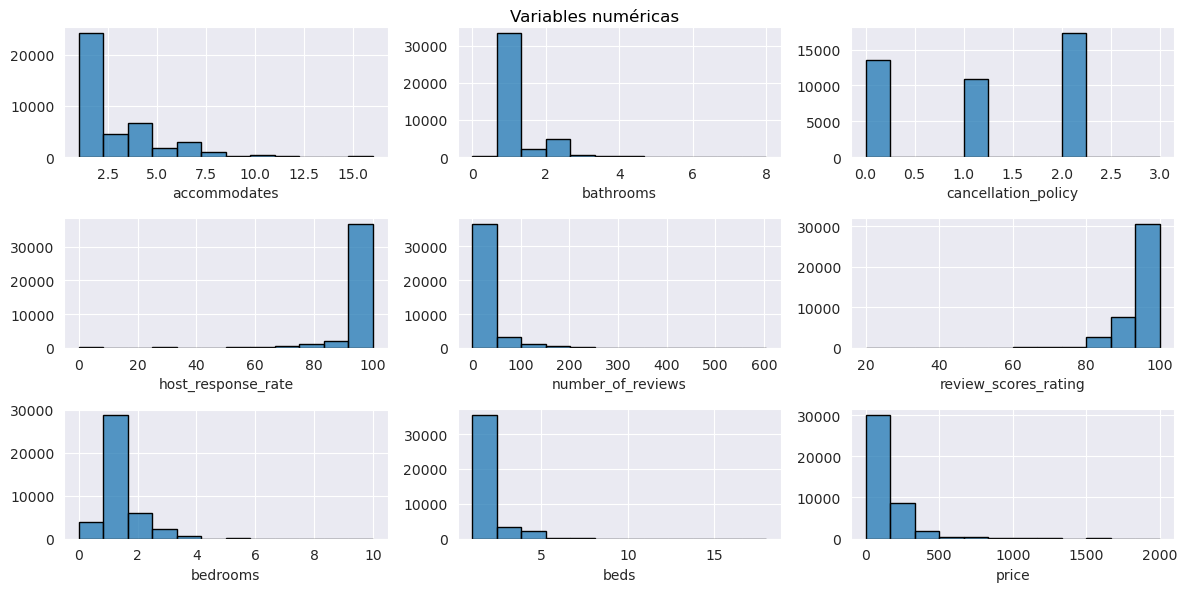

In [51]:
with sns.axes_style("darkgrid"):
    fig, axes = plt.subplots(len(columnas) // 3, 3, figsize=(12, 6))
for i, col in enumerate(columnas):
    ax = sns.histplot(data=train, x=train[col], ax=axes[i // 3, i % 3], bins=12)
    ax.set_title("")
    ax.set_ylabel("")
fig.tight_layout()
fig.subplots_adjust(top=.95)
fig.suptitle("Variables numéricas")
plt.show()

In [52]:
train[columnas].skew()

accommodates            2.322361
bathrooms               3.781358
cancellation_policy    -0.166668
host_response_rate     -5.139416
number_of_reviews       3.723092
review_scores_rating   -3.963059
bedrooms                1.997286
beds                    3.509220
price                   4.396296
dtype: float64

### Tratamiento de *skewness* negativo: columnas *host_response_rate* y *review_scores_rating*

In [53]:
print(f"Skewness de las columnas host_response_rate y review_scores_rating: {train.host_response_rate.skew()} y {train.review_scores_rating.skew()}.")
# Se "refleja" (se resta el mayor valor al valor de la columna, se suma uno y al resultado se aplica el logaritmo neperiano o natural):
max_host_response_rate = train["host_response_rate"].max()
train["host_response_rate"] = train["host_response_rate"].apply(lambda x: np.log(max_host_response_rate - x + 1))
test["host_response_rate"] = test["host_response_rate"].apply(lambda x: np.log(max_host_response_rate - x + 1))
max_review_scores_rating = train["review_scores_rating"].max()
train["review_scores_rating"] = train["review_scores_rating"].apply(lambda x: np.log(max_review_scores_rating - x + 1))
test["review_scores_rating"] = test["review_scores_rating"].apply(lambda x: np.log(max_review_scores_rating - x + 1))
print(f"Skewness de las columnas host_response_rate y review_scores_rating después de aplicar el cambio: {train.host_response_rate.skew()} y {train.review_scores_rating.skew()}.")

Skewness de las columnas host_response_rate y review_scores_rating: -5.139416440559483 y -3.963059129428246.
Skewness de las columnas host_response_rate y review_scores_rating después de aplicar el cambio: 2.3467018571313134 y -0.1557834026865432.


In [54]:
train[columnas].skew()

accommodates            2.322361
bathrooms               3.781358
cancellation_policy    -0.166668
host_response_rate      2.346702
number_of_reviews       3.723092
review_scores_rating   -0.155783
bedrooms                1.997286
beds                    3.509220
price                   4.396296
dtype: float64

### Tratamiento de *skewness* positivo: columnas *bathrooms*, *number_of_reviews*, *beds*, *host_response_rate*, *accommodates* y *bedrooms*

In [55]:
print(f"Skewness de las columnas bathrooms, number_of_reviews, beds, host_response_rate, accommodates y bedrooms: \n{train.bathrooms.skew()}, {train.number_of_reviews.skew()}, {train.beds.skew()}, {train.host_response_rate.skew()}, {train.accommodates.skew()} y {train.bedrooms.skew()}.")
train.bathrooms = train.bathrooms.apply(lambda x: np.log(x + .1))
train.number_of_reviews = train.number_of_reviews.apply(lambda x: np.log(x + 1))
train.beds = train.beds.apply(lambda x: np.log(x + .1))
train.host_response_rate = train.host_response_rate.apply(lambda x: np.log(x + .1))
train.accommodates  = train.accommodates.apply(lambda x: np.log(x + .1))
train.bedrooms  = train.bedrooms .apply(lambda x: np.log(x + 1))
test.bathrooms = test.bathrooms.apply(lambda x: np.log(x + .1))
test.number_of_reviews = test.number_of_reviews.apply(lambda x: np.log(x + 1))
test.beds = test.beds.apply(lambda x: np.log(x + .1))
test.host_response_rate = test.host_response_rate.apply(lambda x: np.log(x + .1))
test.accommodates  = test.accommodates.apply(lambda x: np.log(x + .1))
test.bedrooms  = test.bedrooms .apply(lambda x: np.log(x + 1))
print(f"Skewness de las columnas bathrooms, number_of_reviews, beds, host_response_rate, accommodates y bedrooms después de aplicar el cambio: \n{train.bathrooms.skew()}, {train.number_of_reviews.skew()}, {train.beds.skew()}, {train.host_response_rate.skew()}, {train.accommodates.skew()} y {train.bedrooms.skew()}.")

Skewness de las columnas bathrooms, number_of_reviews, beds, host_response_rate, accommodates y bedrooms: 
3.7813582697558017, 3.7230921213208057, 3.5092196579843495, 2.3467018571313134, 2.3223607698713815 y 1.9972860357329496.
Skewness de las columnas bathrooms, number_of_reviews, beds, host_response_rate, accommodates y bedrooms después de aplicar el cambio: 
0.44924844860700736, 0.2945546957904593, 1.306423032866707, 1.947737397782724, 0.39835486504227363 y 0.023670834519118736.


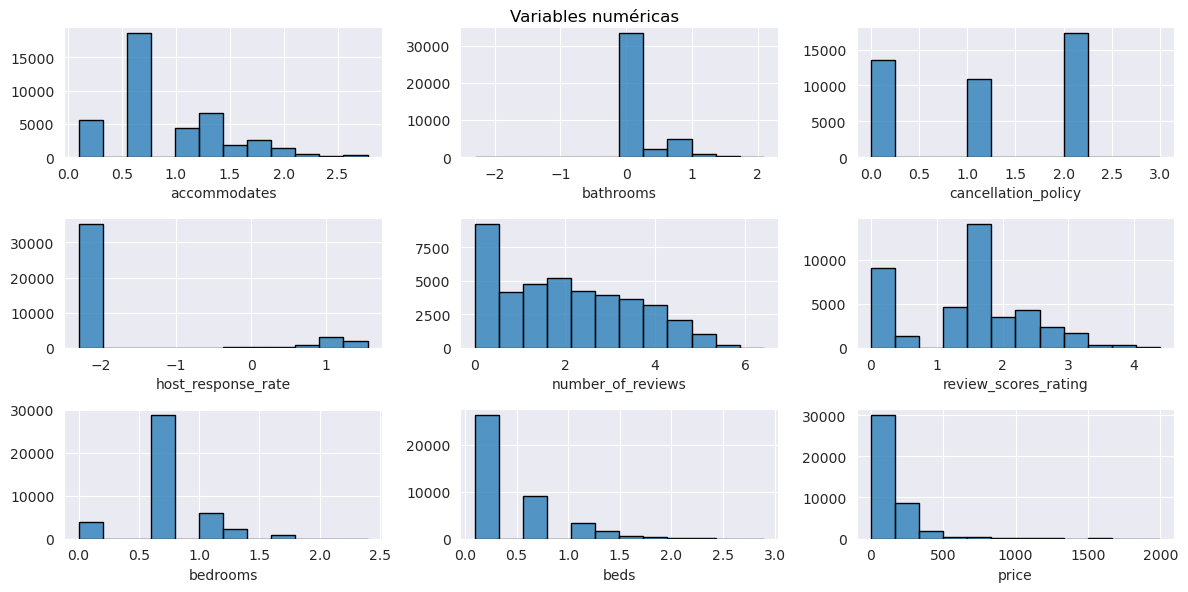

In [56]:
with sns.axes_style("darkgrid"):
    fig, axes = plt.subplots(len(columnas) // 3, 3, figsize=(12, 6))
for i, col in enumerate(columnas):
    ax = sns.histplot(data=train, x=train[col], ax=axes[i // 3, i % 3], bins=12)
    ax.set_title("")
    ax.set_ylabel("")
fig.tight_layout()
fig.subplots_adjust(top=.95)
fig.suptitle("Variables numéricas")
plt.show()

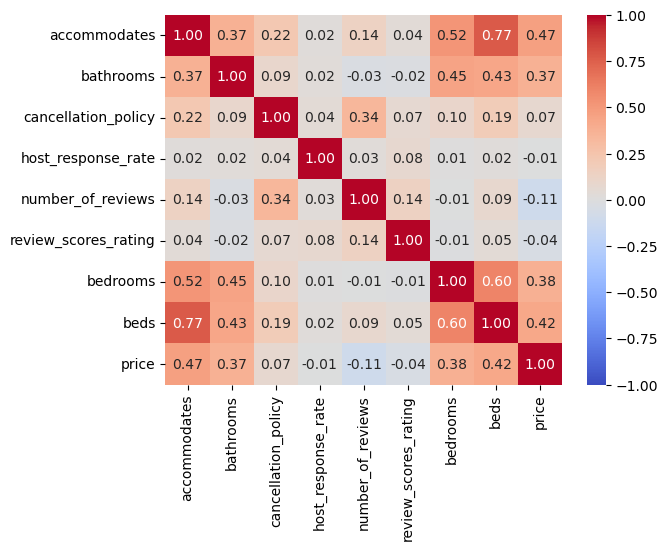

In [57]:
sns.heatmap(train[columnas].corr(), annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm', fmt=".2f")
plt.show()

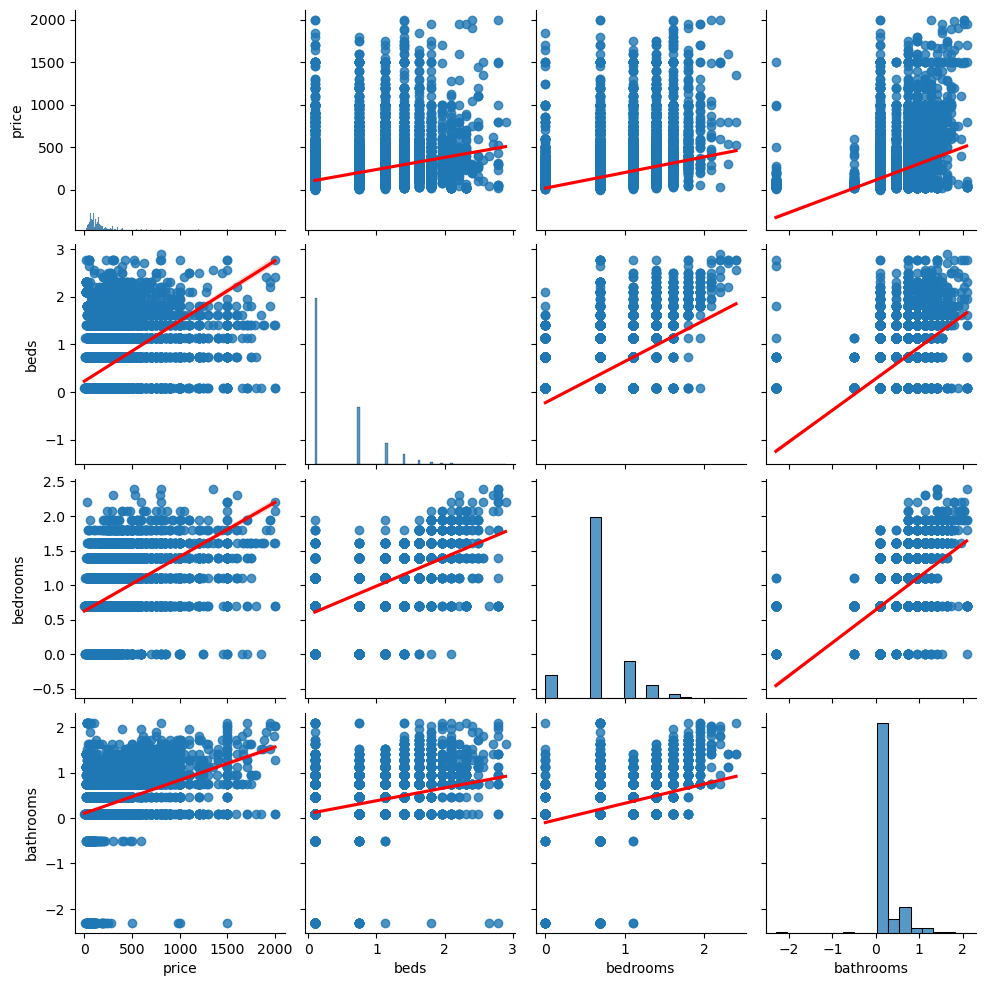

In [58]:
columnas = ["price", "beds", "bedrooms","bathrooms"]
sns.pairplot(train[columnas], kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.show()

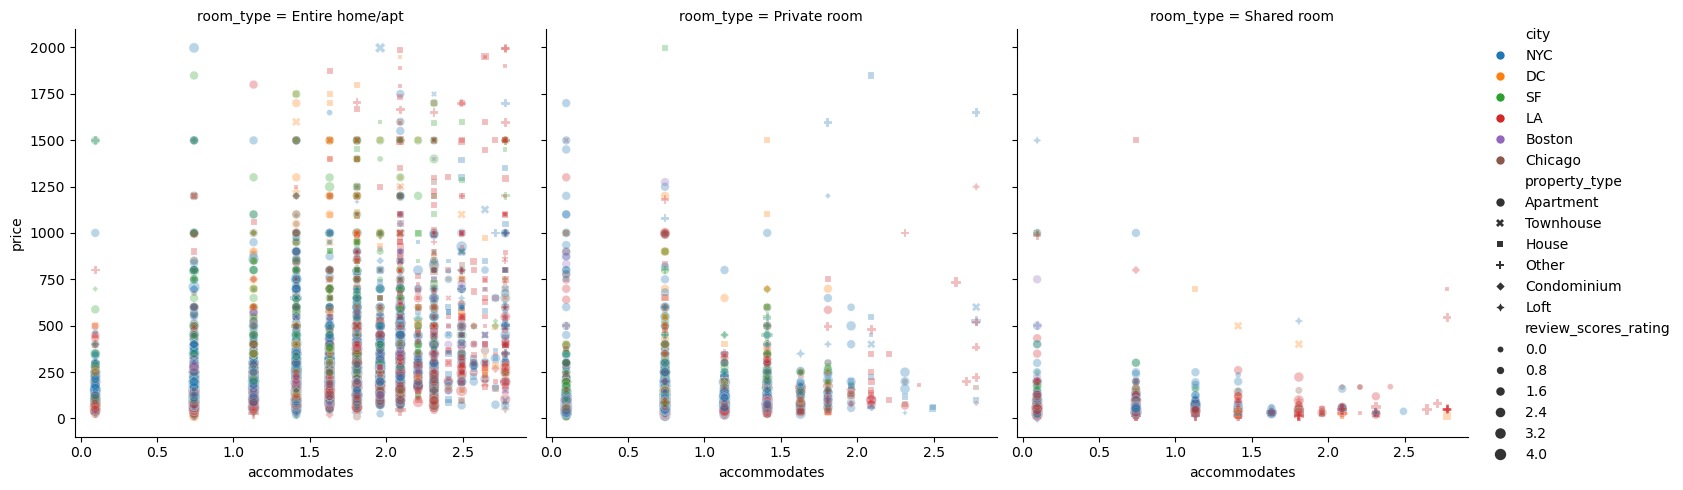

In [59]:
g = sns.relplot(train, x="accommodates", y="price", hue="city", style="property_type", col="room_type", size="review_scores_rating", alpha=0.3)
for lh in g.legend.legend_handles:
    lh.set_alpha(1) 
plt.show()

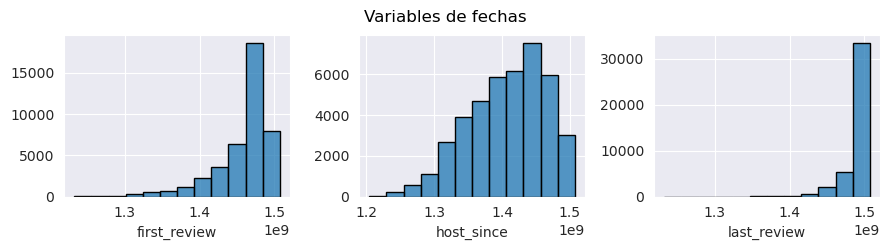

In [60]:
with sns.axes_style("darkgrid"):
    fig, axes = plt.subplots(len(columnas_fechas) // 3, 3, figsize=(9, 2.5))
for i, col in enumerate(columnas_fechas):
    ax = sns.histplot(data=train, x=train[col], ax=axes[i], bins=12)
    ax.set_title("")
    ax.set_ylabel("")
fig.tight_layout()
fig.subplots_adjust(top=.88)
fig.suptitle("Variables de fechas")
plt.show()

In [61]:
train[columnas_fechas].skew()

first_review   -1.745751
host_since     -0.476694
last_review    -2.620378
dtype: float64

### Tratamiento de *skewness* negativo: columnas *first_review* y *last_review*

In [62]:
print(f"Skewness de las columnas host_response_rate y review_scores_rating: {train.first_review.skew()} y {train.last_review.skew()}.")
# Se "refleja" (se resta el mayor valor al valor de la columna, se suma uno y al resultado se aplica el logaritmo neperiano o natural):
max_first_review = train["first_review"].max()
train["first_review"] = train["first_review"].apply(lambda x: np.log(max_first_review - x + 1))
test["first_review"] = test["first_review"].apply(lambda x: np.log(max_first_review - x + 1))
max_last_review = train["last_review"].max()
train["last_review"] = train["last_review"].apply(lambda x: np.log(max_last_review - x + 1))
test["last_review"] = test["last_review"].apply(lambda x: np.log(max_last_review - x + 1))
print(f"Skewness de las columnas host_response_rate y review_scores_rating después de aplicar el cambio: {train.first_review.skew()} y {train.last_review.skew()}.")
train[columnas_fechas].skew()

Skewness de las columnas host_response_rate y review_scores_rating: -1.7457510843709396 y -2.6203775481148996.
Skewness de las columnas host_response_rate y review_scores_rating después de aplicar el cambio: -1.5151597065593556 y -1.5981450212780721.


first_review   -1.515160
host_since     -0.476694
last_review    -1.598145
dtype: float64

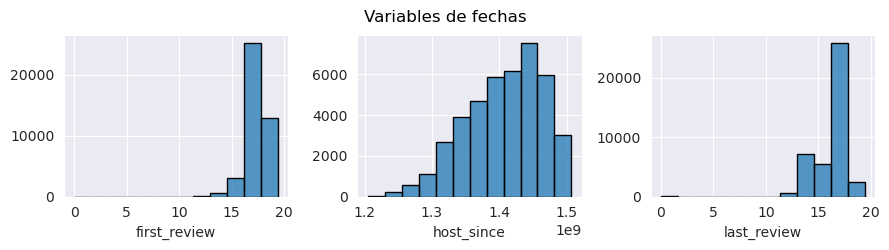

In [63]:
with sns.axes_style("darkgrid"):
    fig, axes = plt.subplots(len(columnas_fechas) // 3, 3, figsize=(9, 2.5))
for i, col in enumerate(columnas_fechas):
    ax = sns.histplot(data=train, x=train[col], ax=axes[i], bins=12)
    ax.set_title("")
    ax.set_ylabel("")
fig.tight_layout()
fig.subplots_adjust(top=.88)
fig.suptitle("Variables de fechas")
plt.show()

# Aplicación de one hot encoding a columnas categóricas

In [64]:
columnas_categoricas

['property_type', 'room_type', 'city']

In [66]:
X_train = train.copy()
X_test = test.copy()
y_train = X_train["price"]
y_test = X_test["price"]
X_train.drop(["price"], axis=1, inplace=True)
X_test.drop(["price"], axis=1, inplace=True)

In [67]:
cat_encoder = OneHotEncoder(sparse_output=False)
cat_encoder.fit(X_train[columnas_categoricas])
columnas = [cateogria + ": " + str(cat) for index, cateogria in enumerate(columnas_categoricas) for cat in cat_encoder.categories_[index]]
X_train_1hot = pd.DataFrame(cat_encoder.transform(X_train[columnas_categoricas]), columns=columnas)
X_test_1hot = pd.DataFrame(cat_encoder.transform(X_test[columnas_categoricas]), columns=columnas)

X_train_1hot.index = X_train.index
X_test_1hot.index = X_test.index

num_X_train = X_train.drop(columnas_categoricas, axis=1)
num_X_test = X_test.drop(columnas_categoricas, axis=1)

X_train = pd.concat([num_X_train, X_train_1hot], axis=1)
X_test = pd.concat([num_X_test, X_test_1hot], axis=1)

X_train.head()

,accommodates,bathrooms,cancellation_policy,cleaning_fee,first_review,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,...,property_type: Townhouse,room_type: Entire home/apt,room_type: Private room,room_type: Shared room,city: Boston,city: Chicago,city: DC,city: LA,city: NYC,city: SF
22886,1.629241,0.09531,0,1,17.423527,1,-2.302585,1.383955e+09,0,15.899343,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10115,0.741937,0.09531,2,1,16.441917,1,0.980185,1.363392e+09,1,16.441917,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5972,0.741937,0.09531,0,0,14.800731,1,-2.302585,1.496534e+09,0,14.502238,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
31282,0.741937,0.09531,1,1,15.298569,1,-2.302585,1.422835e+09,1,13.851651,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23369,0.095310,0.09531,0,0,17.567252,0,-2.302585,1.344557e+09,0,16.435647,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [69]:
X_train

,accommodates,bathrooms,cancellation_policy,cleaning_fee,first_review,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,...,property_type: Townhouse,room_type: Entire home/apt,room_type: Private room,room_type: Shared room,city: Boston,city: Chicago,city: DC,city: LA,city: NYC,city: SF
0,1.326214,0.0,-0.5,0.0,-0.187761,0.0,0.000000,-0.349896,0.0,-0.357182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.0,0.5,0.0,-1.470128,0.0,3.282770,-0.596273,1.0,0.004176,...,1.0,-1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.000000,0.0,-0.5,-1.0,-3.614158,0.0,0.000000,0.998965,0.0,-1.287661,...,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.0,0.0,0.0,-2.963787,0.0,0.000000,0.115942,1.0,-1.720955,...,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.966486,0.0,-0.5,-1.0,0.000000,-1.0,0.000000,-0.821946,0.0,0.000000,...,0.0,-1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41757,0.000000,0.0,0.5,0.0,0.833341,-1.0,0.000000,-0.878882,0.0,0.614430,...,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41758,0.000000,0.0,0.5,0.0,-1.398635,0.0,0.000000,0.596273,0.0,0.040623,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41759,1.000000,0.0,0.0,-1.0,1.292560,-1.0,3.218034,-0.278468,0.0,-1.488981,...,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41760,-0.966486,0.0,-0.5,0.0,-0.286224,-1.0,0.000000,0.515528,0.0,-0.034382,...,0.0,-1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## REDES NEURONALES
